In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# Importing Regression Modules
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('/Users/ElenaGualda_1/Desktop/Winter 2024/Data Mining/Assignment 3/Assignment-03-2024/Loan_Prediction/Data for Cleaning _ Modeling.csv')

df.head()

/var/folders/hm/gwb0cqbs5g57t8bgrprc_2t40000gn/T/ipykernel_21902/2415690009.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/ElenaGualda_1/Desktop/Winter 2024/Data Mining/Assignment 3/Assignment-03-2024/Loan_Prediction/Data for Cleaning _ Modeling.csv')


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,11.89%,54734.0,80364.0,"$25,000","$25,000","$19,080",36 months,B,B4,NaN,...,Feb-94,0.0,NaN,NaN,10.0,0.0,28854.0,52.10%,42.0,f
1,10.71%,55742.0,114426.0,"$7,000","$7,000",$673,36 months,B,B5,CNN,...,Oct-00,0.0,NaN,NaN,7.0,0.0,33623.0,76.70%,7.0,f
2,16.99%,57167.0,137225.0,"$25,000","$25,000","$24,725",36 months,D,D3,Web Programmer,...,Jun-00,0.0,41.0,NaN,10.0,0.0,19878.0,66.30%,17.0,f
3,13.11%,57245.0,138150.0,"$1,200","$1,200","$1,200",36 months,C,C2,city of beaumont texas,...,Jan-85,0.0,64.0,NaN,5.0,0.0,2584.0,40.40%,31.0,f
4,13.57%,57416.0,139635.0,"$10,800","$10,800","$10,692",36 months,C,C3,State Farm Insurance,...,Dec-96,1.0,58.0,NaN,14.0,0.0,3511.0,25.60%,40.0,f


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      338990 non-null  object 
 1   X2      399999 non-null  float64
 2   X3      399999 non-null  float64
 3   X4      399999 non-null  object 
 4   X5      399999 non-null  object 
 5   X6      399999 non-null  object 
 6   X7      399999 non-null  object 
 7   X8      338730 non-null  object 
 8   X9      338730 non-null  object 
 9   X10     376014 non-null  object 
 10  X11     382462 non-null  object 
 11  X12     338639 non-null  object 
 12  X13     338972 non-null  float64
 13  X14     399999 non-null  object 
 14  X15     399999 non-null  object 
 15  X16     123560 non-null  object 
 16  X17     399999 non-null  object 
 17  X18     399981 non-null  object 
 18  X19     399999 non-null  object 
 19  X20     399999 non-null  object 
 20  X21     399999 non-null  float64
 21  X22     39

# Dropping columns that won't aide in analysis

In [4]:
df = df.drop(['X18', 'X19', 'X25','X26','X16','X9'], axis=1)

In [5]:
df = df.dropna(subset=['X1'], axis=0)

In [6]:
#stripping the percent sign and then changing it from an object to a float
df['X1'] = pd.to_numeric(df['X1'].str.rstrip('%'), errors='coerce')

df['X1'] = df['X1'].astype(float)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338990 entries, 0 to 399999
Data columns (total 26 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      338990 non-null  float64
 1   X2      338989 non-null  float64
 2   X3      338989 non-null  float64
 3   X4      338989 non-null  object 
 4   X5      338989 non-null  object 
 5   X6      338989 non-null  object 
 6   X7      338989 non-null  object 
 7   X8      287123 non-null  object 
 8   X10     318733 non-null  object 
 9   X11     324195 non-null  object 
 10  X12     287030 non-null  object 
 11  X13     287238 non-null  float64
 12  X14     338989 non-null  object 
 13  X15     338989 non-null  object 
 14  X17     338989 non-null  object 
 15  X20     338989 non-null  object 
 16  X21     338989 non-null  float64
 17  X22     338989 non-null  float64
 18  X23     338989 non-null  object 
 19  X24     338989 non-null  float64
 20  X27     338989 non-null  float64
 21  X28     33

# Handling all Missing Values first 

In [8]:
#Using the median of the annual income and imputing the missing values with that median value due to the right skewed distribution. 
median_income = df['X13'].median()

df['X13'].fillna(median_income, inplace=True)

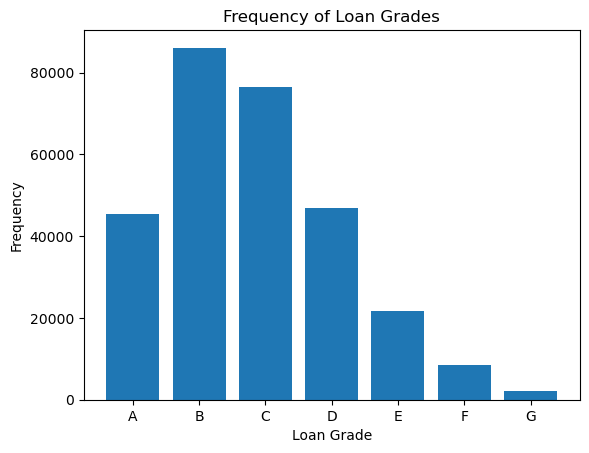

In [9]:
#plotting loan grade to see the distribution to figure out how to calculate the missing values

loan_grade_counts = df['X8'].value_counts()

loan_grade_counts = loan_grade_counts.sort_index()

plt.bar(loan_grade_counts.index, loan_grade_counts.values)

plt.xlabel('Loan Grade')
plt.ylabel('Frequency')
plt.title('Frequency of Loan Grades')

plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
#Im using label encoder to make the categorical data of the loan grade to numeric data and finding the median to fill empty values
label_encoder = LabelEncoder()
df['X8'] = label_encoder.fit_transform(df['X8'])
                                       
median_value = df['X8'].median()

df['X8'].fillna(median_value, inplace=True)


In [12]:
df['X8'] = df['X8'].astype(float)

In [13]:
median_value #median value of Loan grade is 2 which is "C"

2.0

In [14]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X10,X11,...,X21,X22,X23,X24,X27,X28,X29,X30,X31,X32
0,11.89,54734.0,80364.0,"$25,000","$25,000","$19,080",36 months,1.0,NaN,< 1 year,...,19.48,0.0,Feb-94,0.0,10.0,0.0,28854.0,52.10%,42.0,f
1,10.71,55742.0,114426.0,"$7,000","$7,000",$673,36 months,1.0,CNN,< 1 year,...,14.29,0.0,Oct-00,0.0,7.0,0.0,33623.0,76.70%,7.0,f
2,16.99,57167.0,137225.0,"$25,000","$25,000","$24,725",36 months,3.0,Web Programmer,1 year,...,10.50,0.0,Jun-00,0.0,10.0,0.0,19878.0,66.30%,17.0,f
3,13.11,57245.0,138150.0,"$1,200","$1,200","$1,200",36 months,2.0,city of beaumont texas,10+ years,...,5.47,0.0,Jan-85,0.0,5.0,0.0,2584.0,40.40%,31.0,f
4,13.57,57416.0,139635.0,"$10,800","$10,800","$10,692",36 months,2.0,State Farm Insurance,6 years,...,11.63,0.0,Dec-96,1.0,14.0,0.0,3511.0,25.60%,40.0,f


In [15]:
#dropping X10(job title) since annual income can be used
df = df.drop(['X10'], axis=1)

In [16]:
#Missing Values for X11 - Numbers of years employed

In [17]:
df['X11'] = df['X11'].str.replace(' years?', '', regex=True)

In [18]:
df['X11'] = df['X11'].replace({'< 1': 0, '<1': 0, '< 1 ': 0}, regex=True)

In [19]:
df['X11'].head()

0      0
1      0
2      1
3    10+
4      6
Name: X11, dtype: object

In [20]:
df['X11'] = df['X11'].replace('\+', '', regex=True)

In [21]:
df['X11'].head()

0     0
1     0
2     1
3    10
4     6
Name: X11, dtype: object

In [22]:
df['X11'] = df['X11'].astype(float)

In [23]:
label_encoder = LabelEncoder()
df['X11'] = label_encoder.fit_transform(df['X11'])
                                       
median_value = df['X11'].median()

df['X11'].fillna(median_value, inplace=True)

#Handling X12 Home Ownership Status 

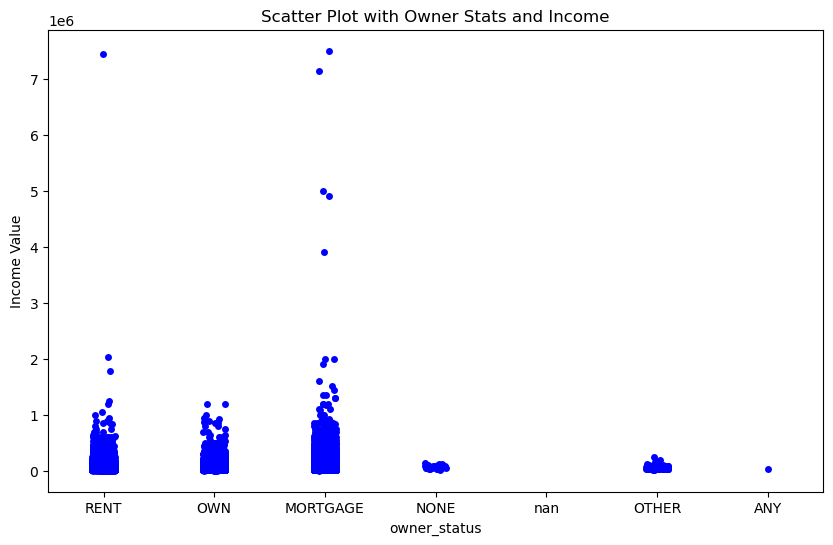

In [24]:
#plotting X12 & X13 to see if there is a correlation between annual income and home status to see how I can fill out NA values.

owner_status = df['X12']
Income = df['X13']

plt.figure(figsize=(10, 6))
sns.stripplot(x=owner_status, y=Income, color='blue')

plt.xlabel('owner_status')
plt.ylabel('Income Value')
plt.title('Scatter Plot with Owner Stats and Income')

plt.show()

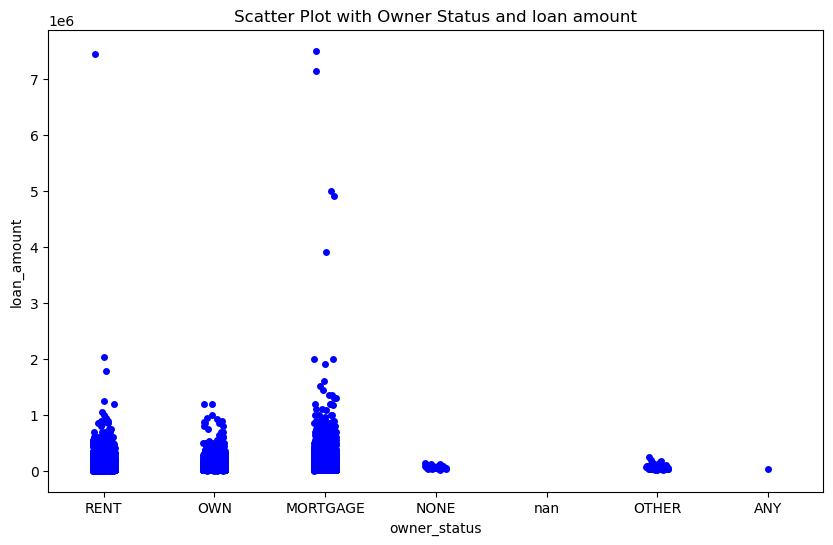

In [25]:
#plotting X12 & X5 to see if there is a correlation between loan amount and home status to see how I can fill out NA values.

owner_status = df['X12']
loan_amount = df['X5']

plt.figure(figsize=(10, 6))
sns.stripplot(x=owner_status, y=Income, color='blue')

plt.xlabel('owner_status')
plt.ylabel('loan_amount')
plt.title('Scatter Plot with Owner Status and loan amount')

plt.show()

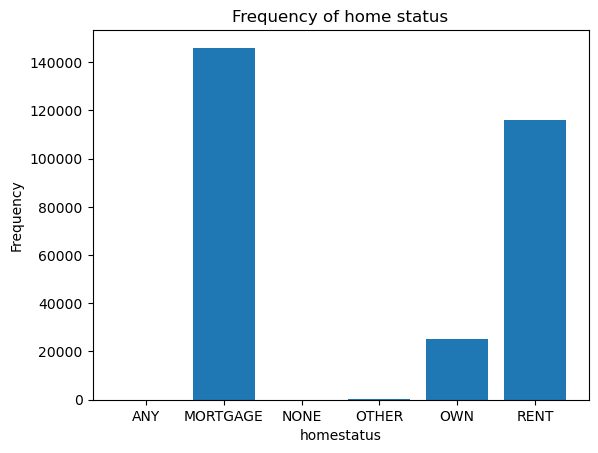

In [26]:
#plotting home status to see the distribution to figure out how to calculate the missing values

home_status = df['X12'].value_counts()

home_status = home_status.sort_index()

plt.bar(home_status.index, home_status.values)

plt.xlabel('homestatus')
plt.ylabel('Frequency')
plt.title('Frequency of home status')

plt.show()

In [27]:
df['X12'].fillna('OTHER', inplace=True)

In [28]:
#Replacing all missing values with "OTHER" while also using label encoder to ensure values aren't counted numerically 
#in order to have a more balanced data set without skewing the Rent or Mortgage categories

label_encoder = LabelEncoder()
df['X12'] = label_encoder.fit_transform(df['X12'])

In [29]:
df['X12'].head()

0    5
1    5
2    5
3    4
4    5
Name: X12, dtype: int64

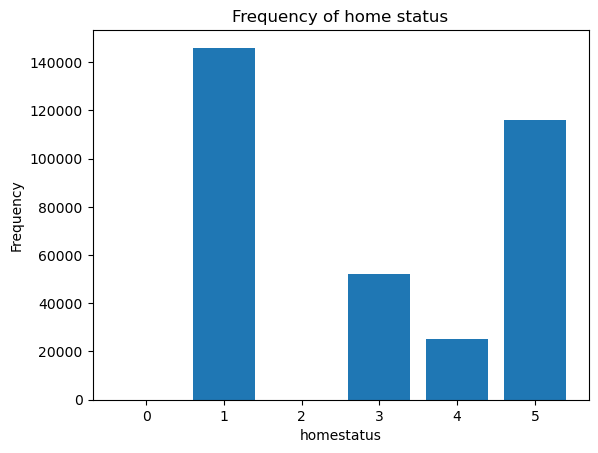

In [30]:
home_status = df['X12'].value_counts()

home_status = home_status.sort_index()

plt.bar(home_status.index, home_status.values)

plt.xlabel('homestatus')

plt.ylabel('Frequency')
plt.title('Frequency of home status')

plt.show()

In [31]:
df['X12'] = df['X12'].astype(float)

#Handling X30 Revolving Line Utilization Credit (Ratio being spent in relation to the loan)

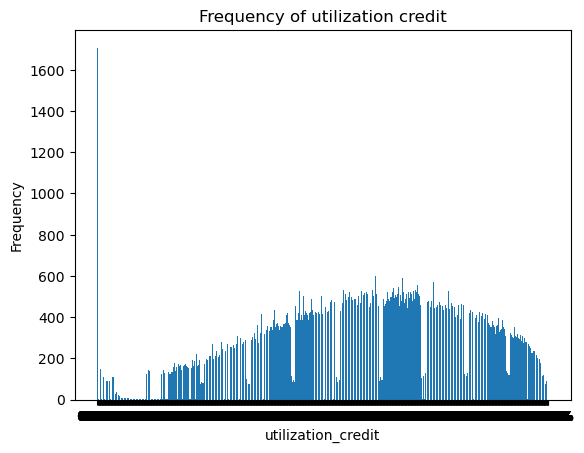

In [32]:
#box plot to see distribution and if I should take the mean or median - used mean to replace NA values
utilization_credit = df['X30'].value_counts()

utilization_credit = utilization_credit.sort_index()

plt.bar(utilization_credit.index, utilization_credit.values)

plt.xlabel('utilization_credit')
plt.ylabel('Frequency')
plt.title('Frequency of utilization credit')

plt.show()

In [33]:
#stripping the percent sign and then changing it from an object to a float
df['X30'] = df['X30'].str.rstrip('%').astype(float)

In [34]:
#Using the mean of the annual utilization and imputing the missing values with that mean value.
mean_utilization = df['X30'].mean()

df['X30'].fillna(mean_utilization, inplace=True)

In [35]:
print(df['X30'])

0         52.1
1         76.7
2         66.3
3         40.4
4         25.6
          ... 
399995    76.1
399996    37.8
399997    69.3
399998    39.0
399999    53.7
Name: X30, Length: 338990, dtype: float64


#Handling X7 to remove "months" and encode 

In [36]:
#stripping the "months" and then changing it from an object to a float
df['X7'] = df['X7'].str.rstrip('months')

In [37]:
#encoding X7
label_encoder = LabelEncoder()
df['X7'] = label_encoder.fit_transform(df['X7'])

In [38]:
df['X7'] = df['X7'].astype(float)

In [39]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X11,X12,...,X21,X22,X23,X24,X27,X28,X29,X30,X31,X32
0,11.89,54734.0,80364.0,"$25,000","$25,000","$19,080",0.0,1.0,0,5.0,...,19.48,0.0,Feb-94,0.0,10.0,0.0,28854.0,52.1,42.0,f
1,10.71,55742.0,114426.0,"$7,000","$7,000",$673,0.0,1.0,0,5.0,...,14.29,0.0,Oct-00,0.0,7.0,0.0,33623.0,76.7,7.0,f
2,16.99,57167.0,137225.0,"$25,000","$25,000","$24,725",0.0,3.0,1,5.0,...,10.50,0.0,Jun-00,0.0,10.0,0.0,19878.0,66.3,17.0,f
3,13.11,57245.0,138150.0,"$1,200","$1,200","$1,200",0.0,2.0,10,4.0,...,5.47,0.0,Jan-85,0.0,5.0,0.0,2584.0,40.4,31.0,f
4,13.57,57416.0,139635.0,"$10,800","$10,800","$10,692",0.0,2.0,6,5.0,...,11.63,0.0,Dec-96,1.0,14.0,0.0,3511.0,25.6,40.0,f


#Handling X14 by encoding

In [40]:
#encoding X14
label_encoder = LabelEncoder()
df['X14'] = label_encoder.fit_transform(df['X14'])

In [41]:
df['X14'] = df['X14'].astype(float)


In [42]:
#dropping X17 self reported loan category is not useful in analysis 
df = df.drop(['X17'], axis=1)

In [43]:
#Changing money to floats 
df['X4'] = df['X4'].str.replace('$', '').astype(str).str.replace(',', '').astype(float)
df['X5'] = df['X5'].str.replace('$', '').astype(str).str.replace(',', '').astype(float)
df['X6'] = df['X6'].str.replace('$', '').astype(str).str.replace(',', '').astype(float)

/var/folders/hm/gwb0cqbs5g57t8bgrprc_2t40000gn/T/ipykernel_21902/4015787570.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['X4'] = df['X4'].str.replace('$', '').astype(str).str.replace(',', '').astype(float)
/var/folders/hm/gwb0cqbs5g57t8bgrprc_2t40000gn/T/ipykernel_21902/4015787570.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['X5'] = df['X5'].str.replace('$', '').astype(str).str.replace(',', '').astype(float)
/var/folders/hm/gwb0cqbs5g57t8bgrprc_2t40000gn/T/ipykernel_21902/4015787570.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as l

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338990 entries, 0 to 399999
Data columns (total 24 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      338990 non-null  float64
 1   X2      338989 non-null  float64
 2   X3      338989 non-null  float64
 3   X4      338989 non-null  float64
 4   X5      338989 non-null  float64
 5   X6      338989 non-null  float64
 6   X7      338990 non-null  float64
 7   X8      338990 non-null  float64
 8   X11     338990 non-null  int64  
 9   X12     338990 non-null  float64
 10  X13     338990 non-null  float64
 11  X14     338990 non-null  float64
 12  X15     338989 non-null  object 
 13  X20     338989 non-null  object 
 14  X21     338989 non-null  float64
 15  X22     338989 non-null  float64
 16  X23     338989 non-null  object 
 17  X24     338989 non-null  float64
 18  X27     338989 non-null  float64
 19  X28     338989 non-null  float64
 20  X29     338989 non-null  float64
 21  X30     33

In [45]:
#encoding X20 (State)
label_encoder = LabelEncoder()
df['X20'] = label_encoder.fit_transform(df['X20'])

In [46]:
df['X20'] = df['X20'].astype(float)

In [47]:
#encoding X32 (initial listing of the loan)
label_encoder = LabelEncoder()
df['X32'] = label_encoder.fit_transform(df['X32'])

In [48]:
df['X32'] = df['X32'].astype(float)

# Handling X23- Date of borrowers last open credit line

In [49]:
df['X23'].head()

0    Feb-94
1    Oct-00
2    Jun-00
3    Jan-85
4    Dec-96
Name: X23, dtype: object

In [50]:
# dropping the month and making this just YYYY
df['X23'] = pd.to_datetime(df['X23'], format='%b-%y')

# Extract the year and converting it to float
df['X23'] = df['X23'].dt.year.astype(float)


In [51]:
df['X23'].head()

0    1994.0
1    2000.0
2    2000.0
3    1985.0
4    1996.0
Name: X23, dtype: float64

# Handling X15- Date Loan was Issued

In [52]:
df['X15'].head()

0    Aug-09
1    May-08
2    Aug-14
3    Mar-10
4    Nov-09
Name: X15, dtype: object

In [53]:
# dropping the month and making this just YYYY
df['X15'] = pd.to_datetime(df['X15'], format='%b-%y')

# Extract the year and converting it to float
df['X15'] = df['X15'].dt.year.astype(float)


In [54]:
df['X15'].head()

0    2009.0
1    2008.0
2    2014.0
3    2010.0
4    2009.0
Name: X15, dtype: float64

In [55]:
nan_count = df.isnull().sum()

In [56]:
print(nan_count)

X1     0
X2     1
X3     1
X4     1
X5     1
X6     1
X7     0
X8     0
X11    0
X12    0
X13    0
X14    0
X15    1
X20    0
X21    1
X22    1
X23    1
X24    1
X27    1
X28    1
X29    1
X30    0
X31    1
X32    0
dtype: int64


#Getting rid of leftover NaN values because the modeling does not work otherwise

In [57]:
df.dropna(inplace = True)

In [58]:
print(nan_count)

X1     0
X2     1
X3     1
X4     1
X5     1
X6     1
X7     0
X8     0
X11    0
X12    0
X13    0
X14    0
X15    1
X20    0
X21    1
X22    1
X23    1
X24    1
X27    1
X28    1
X29    1
X30    0
X31    1
X32    0
dtype: int64


In [59]:
# dropping the Date X15
df = df.drop(['X15'], axis=1)

In [60]:
# dropping the Date X23
df = df.drop(['X23'], axis=1)

# Attempting to build Models for Loan Data

In [61]:
#Taking out the X1 column which is the interest rate of the loan because that will be predicted with the model
X, y = df.drop("X1", axis=1), df["X1"]

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [63]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

In [64]:
def model_regression(model):
    regressor = model()
    regressor.fit(train_X, train_y)

    predictions = regressor.predict(test_X)


    mse = mean_squared_error(test_y, predictions)
    rmse = np.sqrt(mse)

    print("Root Mean Squared Error:", rmse)
    
    return regressor

In [65]:
model_regression(DecisionTreeRegressor)

Root Mean Squared Error: 2.095765728958795


DecisionTreeRegressor()

In [66]:
model_regression(RandomForestRegressor)

Root Mean Squared Error: 1.4602610817439305


RandomForestRegressor()

In [67]:
model_regression(GradientBoostingRegressor)

Root Mean Squared Error: 1.5627410814352312


GradientBoostingRegressor()

In [68]:
model_regression(KNeighborsRegressor)

Root Mean Squared Error: 2.584505307221964


KNeighborsRegressor()

In [69]:
model_regression(LinearRegression)

Root Mean Squared Error: 3.1049583209716687


LinearRegression()

Based on the above models, I will be using Random Forest for the test data

# Testing Models using HoldoutCSV

In [70]:
df_test = pd.read_csv('/Users/ElenaGualda_1/Desktop/Winter 2024/Data Mining/Assignment 3/Assignment-03-2024/Loan_Prediction/Holdout for Testing.csv')

In [71]:
df_test.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,NaN,44409194,47416907,"$6,000","$6,000","$6,000",36 months,C,C5,Electrician,...,2-Nov,1,26.0,NaN,18,0,19861,64.50%,33,f
1,NaN,44017917,47034722,"$24,000","$24,000","$24,000",36 months,A,A1,Executive Assistant,...,Dec-68,1,NaN,NaN,12,0,17001,26.20%,36,w
2,NaN,44259158,47306871,"$35,000","$35,000","$35,000",36 months,C,C2,District Sales Leader,...,Oct-98,0,NaN,NaN,16,0,25797,49.90%,33,w
3,NaN,44429213,47476932,"$10,000","$10,000","$10,000",60 months,D,D1,pharmacy associate,...,Feb-99,1,NaN,114.0,13,1,9586,43.80%,21,w
4,NaN,44299188,47346901,"$24,000","$24,000","$24,000",60 months,B,B1,Medical case manager,...,2-Dec,0,48.0,NaN,27,0,31842,41.30%,43,w


In [72]:
#Applying everything I did to train data to the test data so the modeling can be finalized
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      0 non-null      float64
 1   X2      80000 non-null  int64  
 2   X3      80000 non-null  int64  
 3   X4      80000 non-null  object 
 4   X5      80000 non-null  object 
 5   X6      80000 non-null  object 
 6   X7      80000 non-null  object 
 7   X8      80000 non-null  object 
 8   X9      80000 non-null  object 
 9   X10     75606 non-null  object 
 10  X11     75618 non-null  object 
 11  X12     80000 non-null  object 
 12  X13     80000 non-null  float64
 13  X14     80000 non-null  object 
 14  X15     80000 non-null  object 
 15  X16     15 non-null     object 
 16  X17     80000 non-null  object 
 17  X18     80000 non-null  object 
 18  X19     80000 non-null  object 
 19  X20     80000 non-null  object 
 20  X21     80000 non-null  float64
 21  X22     80000 non-null  int64  
 22

In [73]:
df_test = df_test.drop(['X18', 'X19', 'X25','X26','X16','X9', 'X10'], axis=1)

In [74]:
#Using the median of the annual income and imputing the missing values with that median value due to the right skewed distribution. 
median_income = df_test['X13'].median()

df_test['X13'].fillna(median_income, inplace=True)

In [75]:
#Im using label encoder to make the categorical data of the loan grade to numeric data and finding the median to fill empty values
label_encoder = LabelEncoder()
df_test['X8'] = label_encoder.fit_transform(df_test['X8'])
                                       
median_value = df_test['X8'].median()

df_test['X8'].fillna(median_value, inplace=True)

In [76]:
df_test['X8'] = df_test['X8'].astype(float)

In [77]:
df_test['X11'] = df_test['X11'].str.replace(' years?', '', regex=True)

In [78]:
df_test['X11'] = df_test['X11'].replace({'< 1': 0, '<1': 0, '< 1 ': 0}, regex=True)

In [79]:
df_test['X11'] = df_test['X11'].replace('\+', '', regex=True)

In [80]:
df_test['X11'] = df_test['X11'].astype(float)

In [81]:
label_encoder = LabelEncoder()
df_test['X11'] = label_encoder.fit_transform(df_test['X11'])
                                       
median_value = df_test['X11'].median()

df_test['X11'].fillna(median_value, inplace=True)

In [82]:
#handling X12

label_encoder = LabelEncoder()
df_test['X12'] = label_encoder.fit_transform(df_test['X12'])

In [83]:
#stripping the percent sign and then changing it from an object to a float
df_test['X30'] = df_test['X30'].str.rstrip('%').astype(float)

In [84]:
#Using the mean of the annual utilization and imputing the missing values with that mean value.
mean_utilization = df_test['X30'].mean()

df_test['X30'].fillna(mean_utilization, inplace=True)

In [85]:
#stripping the "months" and then changing it from an object to a float
df_test['X7'] = df_test['X7'].str.rstrip('months')

In [86]:
#encoding X7
label_encoder = LabelEncoder()
df_test['X7'] = label_encoder.fit_transform(df_test['X7'])

In [87]:
df_test['X7'] = df_test['X7'].astype(float)

In [88]:
#encoding X14
label_encoder = LabelEncoder()
df_test['X14'] = label_encoder.fit_transform(df_test['X14'])

In [89]:
df_test['X14'] = df_test['X14'].astype(float)

In [90]:
#dropping X17 self reported loan category is not useful in analysis 
df_test = df_test.drop(['X17'], axis=1)

In [91]:
#Changing money to floats 
df_test['X4'] = df_test['X4'].str.replace('$', '').astype(str).str.replace(',', '').astype(float)
df_test['X5'] = df_test['X5'].str.replace('$', '').astype(str).str.replace(',', '').astype(float)
df_test['X6'] = df_test['X6'].str.replace('$', '').astype(str).str.replace(',', '').astype(float)

/var/folders/hm/gwb0cqbs5g57t8bgrprc_2t40000gn/T/ipykernel_21902/4019896137.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_test['X4'] = df_test['X4'].str.replace('$', '').astype(str).str.replace(',', '').astype(float)
/var/folders/hm/gwb0cqbs5g57t8bgrprc_2t40000gn/T/ipykernel_21902/4019896137.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_test['X5'] = df_test['X5'].str.replace('$', '').astype(str).str.replace(',', '').astype(float)
/var/folders/hm/gwb0cqbs5g57t8bgrprc_2t40000gn/T/ipykernel_21902/4019896137.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *

In [92]:
#encoding X20 (State)
label_encoder = LabelEncoder()
df_test['X20'] = label_encoder.fit_transform(df_test['X20'])

In [93]:
df_test['X20'] = df_test['X20'].astype(float)

In [94]:
#encoding X32 (initial listing of the loan)
label_encoder = LabelEncoder()
df_test['X32'] = label_encoder.fit_transform(df_test['X32'])

In [95]:
df_test['X32'] = df_test['X32'].astype(float)

In [96]:
# dropping the Date X23
df_test = df_test.drop(['X23'], axis=1)

In [97]:
# dropping the Date X15
df_test = df_test.drop(['X15'], axis=1)

In [98]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      0 non-null      float64
 1   X2      80000 non-null  int64  
 2   X3      80000 non-null  int64  
 3   X4      80000 non-null  float64
 4   X5      80000 non-null  float64
 5   X6      80000 non-null  float64
 6   X7      80000 non-null  float64
 7   X8      80000 non-null  float64
 8   X11     80000 non-null  int64  
 9   X12     80000 non-null  int64  
 10  X13     80000 non-null  float64
 11  X14     80000 non-null  float64
 12  X20     80000 non-null  float64
 13  X21     80000 non-null  float64
 14  X22     80000 non-null  int64  
 15  X24     80000 non-null  int64  
 16  X27     80000 non-null  int64  
 17  X28     80000 non-null  int64  
 18  X29     80000 non-null  int64  
 19  X30     80000 non-null  float64
 20  X31     80000 non-null  int64  
 21  X32     80000 non-null  float64
dty

In [102]:
# dropping the X1
df_test = df_test.drop(['X1'], axis=1)

# Applying Random Forest Model to Test Data

In [103]:
trained_model_RF = model_regression(RandomForestRegressor)

Root Mean Squared Error: 1.4617783189548048


In [104]:
predictions = trained_model_RF.predict(df_test)

/Users/ElenaGualda_1/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [106]:
predictions

array([16.395 , 17.0092, 14.954 , ..., 15.1317, 15.1317, 15.6541])

In [108]:
df_predictions = pd.DataFrame(predictions)

# Saving results to CSV
df_predictions.to_csv('/Users/ElenaGualda_1/Desktop/Winter 2024/Results_from_EGualda.csv', index=False)

# Brief Writeup - Pros/Cons

I trained my data with a handful of models. The models I were between were Gradient Boosting and Random Forest due to the RMSE. The model I chose was Random Forest due to the RMSE being lower than Gradient Boosing. The pros of Random Forest versus Gradient Boosing include less prone to overfitting and holds importance on features and is not as sensitive to noise. Pros of Gradient boosting include the ability to capture complex features and their respective relationships. Downside to gradient boosting is that it is a bit more computationally expensive due to its sensitivity to noise. 